In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# August 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
def plot_svm_decision_boundary(model, X, y, feature_names=None, class_labels=None, ax=None, legend=True):
    """Plot the decision boundary, margin, and support vectors of an SVM classifier."""
    if feature_names is None:
        feature_names = ['$x_1$', '$x_2$']
    if class_labels is None:
        class_labels = ['Class 0', 'Class 1']
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', s=50, edgecolors='k', label=class_labels[0])
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', s=50, edgecolors='k', label=class_labels[1])
    
    # Create grid to evaluate model
    x0, x1 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 250),  # changed from [-0.1, +0.1] to [-1, +1] for better display
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 250)
    )
    grid = np.c_[x0.ravel(), x1.ravel()]

    # Plot the decision boundary and margins
    y_decision = model.decision_function(grid).reshape(x0.shape)
    ax.contour(x0, x1, y_decision, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Fill the class areas
    y_pred = model.predict(grid).reshape(x0.shape)
    custom_cmap = plt.cm.colors.ListedColormap(['red', 'blue'])
    ax.contourf(x0, x1, y_pred, alpha=0.3, cmap=custom_cmap)
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                   facecolors='none', edgecolors='black', label='support vectors') 

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    if legend:
        ax.legend()

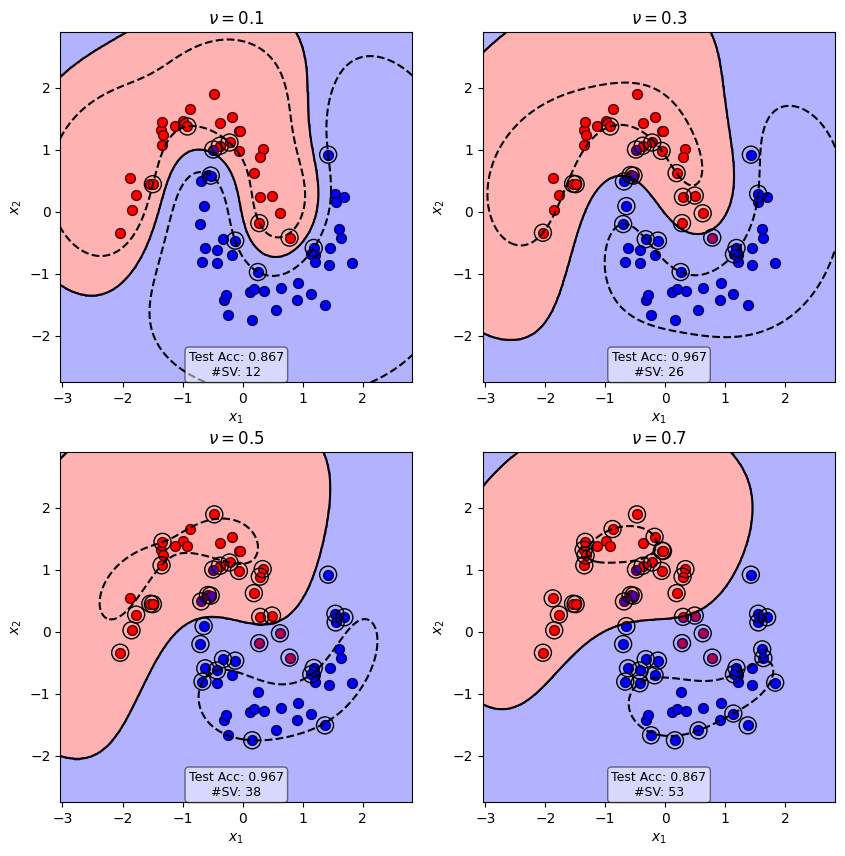

In [5]:
from sklearn.svm import NuSVC

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

nu_values = [0.1, 0.3, 0.5, 0.7]
for nu, ax in zip(nu_values, axes.flat):
    ax.set_title(f'$\\nu = {nu}$')

    # Train NuSVC with the current nu value
    model = NuSVC(nu=nu, kernel='rbf')
    model.fit(X_train_scaled, y_train)

    # Plot the decision boundary
    plot_svm_decision_boundary(model, X_train_scaled, y_train, ax=ax, legend=False)

    # Calculate test accuracy and number of support vectors
    test_accuracy = model.score(X_test_scaled, y_test)
    n_support_vectors = len(model.support_vectors_)
    
    ax.text(0.5, 0.01, f'Test Acc: {test_accuracy:.3f}\n#SV: {n_support_vectors}', ha='center', 
            va='bottom', transform=ax.transAxes, fontsize=9, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.savefig('figures/nu_svm.pdf', bbox_inches='tight')